## 둘 중 하나를 결정하는 문제를 이진 분류라고 한다.  그리고 이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀가 있다.

### 1. 이진 분류(Binary Classification)

x와 y의 관계를 표현하기 위해서 언제나 직선 함수를 사용할 수 있는 것은 아니다.  
S자 형태와 같은, 비선형 함수도 사용한다.

### 2. 시그모이드 함수(Sigmoid function)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#### 1) W가 1이고 b가 0인 그래프

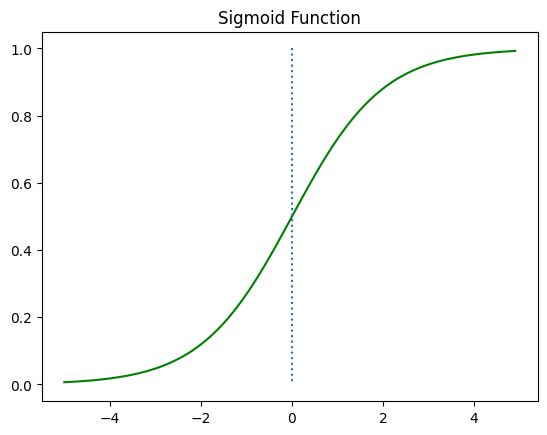

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)  

plt.plot(x,y,'g')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

#### 2) W값의 변화에 따른 경사도의 변화

W값에 따라 그래프의 경사도가 변한다.  
클수록 더욱 가팔라진다.

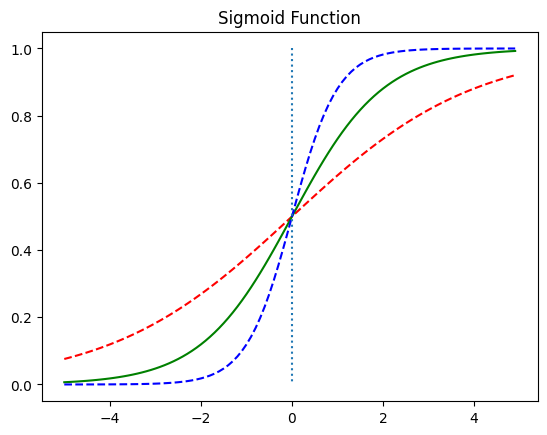

In [5]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r',linestyle='--') # W값의 0.5일 때
plt.plot(x, y2, 'g') # W값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### 3) b값의 변화에 따른 좌, 우 이동

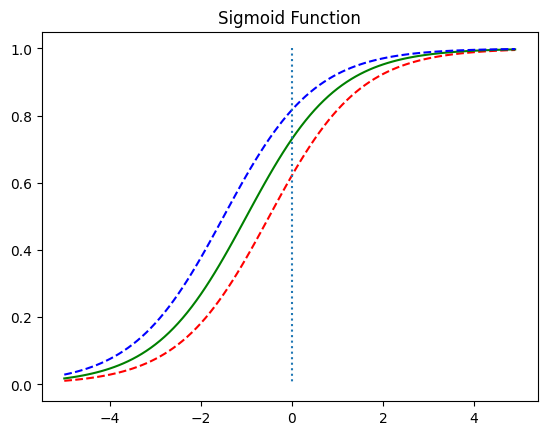

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### 4) 시그모이드 함수를 이용한 분류

시그모이드 함수의 출력값은 0과 1 사이의 값을 가지므로,  
이 특성을 활용해 분류 작업에 활용할 수 있다.

### 3. 비용 함수(Cost function)

시그모이드 함수를 미분하면, 심한 비볼록(non-convex) 형태의 그래프가 나온다.  
위와 같은 그래프에 경사 하강법을 사용했을 때 문제점이 발생한다.  
오차가 최소값이 되는 구간이라고 판단한 그 구간이, 실제 global minimum이 아닐 수 있다는 것이다.

시그모이드 함수의 특징은 함수의 출력값이 0과 1이라는 것이다.  
즉, 실제값이 1일 때, 예측값이 1에 가까우면 오차가 적어야 하고,  
    실제값이 1일 때, 예측값이 0에 가까우면 오차가 매우 커져야 한다.

이를 충족하는 함수가 바로 로그 함수이다.

if y = 1, cost(H(x), y) = -log(H(x))  
if y = 0, cost(H(x), y) = -log(1-H(x))

참고
- -log(1-H(x))의 개형 설명.  
- -log 1-H(x)에서, -H(x) : 정의역이 모두 음의 값. log H(x)에서 y축 대칭.  
- -log 1-H(x)에서, 1-H(x) : 모든 정의역에 +1. x축의 양의 방향으로 그래프 +1 이동
- -log 1-H(x)에서, -log 1-H(x) : 치역이 모두 음의 값. log 1-H(x)에서 x축 대칭.

이를 하나의 식으로 통합하면 다음과 같다.  
cost(H(x), y) = - [ylog H(x) + (1-y)log(1-H(x))]

y = 1이면, '+' 기준으로 우측 값이 없어진다.  
y = 0이면, '+' 기준으로 좌측 값이 없어진다.

이후 모든 오차의 평균을 구한다.

### 4. 파이토치로 로지스틱 회귀 구현하기

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
torch.manual_seed(1)

In [9]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [10]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


현재   
x_train은 6 x 2의 크기를 갖는 행렬이며,  
y_train은 6 x 1 크기를 갖는 벡터이다.  

XW = Y가 성립되기 위해서 필요한 W 벡터의 크기는  
2 x 1이 될 것이다.

In [11]:
W = torch.zeros((2,1), requires_grad=True) 
b = torch.zeros((6,1), requires_grad=True) # Y벡터와 shape가 같아야 더할 수 있음.

In [ ]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train.matmul(W)+b)

In [ ]:
print(hypothesis)
# 자연로그의 밑 e의 지수가 0이면, 1이 된다.
# 즉, -(x_train.matmul(W) + b)가 0이라는 뜻이다. 
# 현재 W, b 모두 지정된 바가 없으므로, 당연한 결과이다.

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [14]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [ ]:
# 하나의 원소에 대해서 오차를 구하는 식
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

모든 원소에 대해서 오차를 구해보자.

In [17]:
losses = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


전체 오차의 평균을 구하자.

In [18]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


파이토치에서 제공하는 로지스틱 회귀의 비용함수는 다음과 같다.

In [19]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

모델의 훈련과정까지 포함한 전체 코드는 다음과 같다.

In [20]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [21]:
# 모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)  

# optimizer 설정
optimizer = optim.SGD([W,b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번째마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


학습이 끝났다.  
이제 학습 데이터를 그대로 입력으로 사용했을 때, 제대로 예측하는지 확인해보자.

현재 W와 b는 훈련 후의 값을 가지고 있다.  
이들을 가지고 예측값을 출력해보자.

In [22]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


실제값과 동일하게 잘 예측한 것을 볼 수 있다.

In [23]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [24]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
